# Tutorial 01: Module Overview

The ERPparam module was developed to parameterize event-related potentials (ERP). The tool identifies peaks in a signal and computes a collection of parameters describing the waveform shape of each peak. This first tutorial will introduce the ERPparam model and the shape parameters computed.

In [1]:
# imports

# standard
import numpy as np
import matplotlib.pyplot as plt

# ERPparam
import sys
sys.path.append('../')
from ERPparam.tests.tutils import default_params
from ERPparam.sim import simulate_erp
from ERPparam import ERPparam
from ERPparam.plts import plot_signals


In [2]:
# settings

# set the random seed for reproducibility
np.random.seed(4)

## Simulate an ERP

First we will simulate an event-related potential (ERP). This example ERP was a positive peak around 100 ms after stimulus onset and a negative peak around 200 ms. 

Peak 0: peak time=0.1 s, peak amplitude=2.0 uV, peak width=0.03 s
Peak 1: peak time=0.2 s, peak amplitude=-1.5 uV, peak width=0.05 s


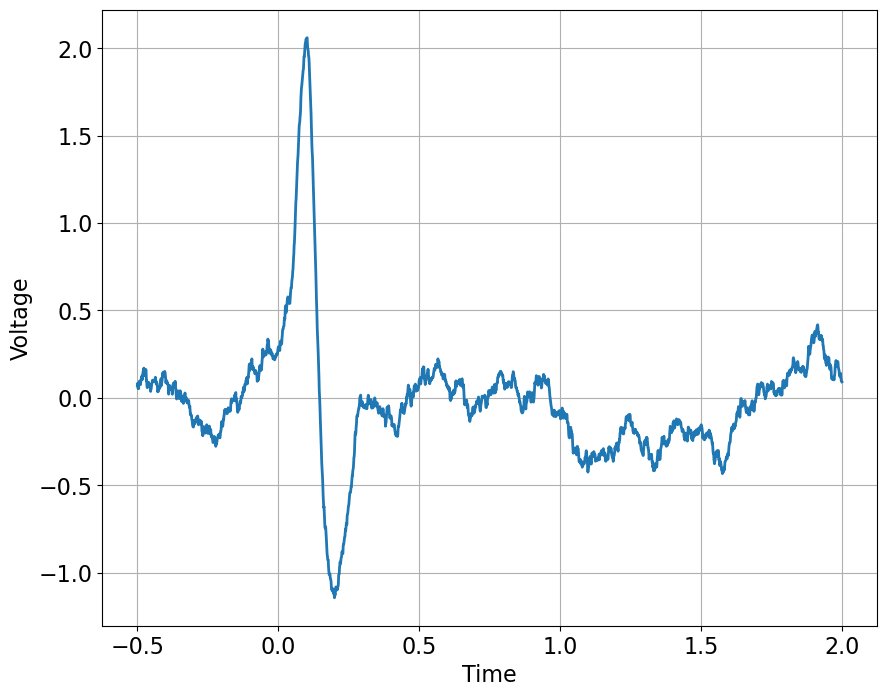

In [13]:
# simulate and plot an ERP

# import default parameters
time_range, erp_params, nlv = default_params()
print(f'Peak 0: peak time={erp_params[0]} s, peak amplitude={erp_params[1]} uV, peak width={erp_params[2]} s')
print(f'Peak 1: peak time={erp_params[3]} s, peak amplitude={erp_params[4]} uV, peak width={erp_params[5]} s')

# simulate an ERP
time, erp = simulate_erp(time_range, erp_params, nlv)

# plot
plot_signals(time, erp)

## Apply ERPparam 

Next we will apply ERPparam to our simulated ERP.  

There are several hyperparameter for the model which we will dive deeper into in tutorial_06-hyperparameter_tuning. Here, we set `peak_threshold` to 5, meaning that only peaks with amplitudes greater than 5 standard deviations above the mean are parameterized.

                                                                                                  
                                             ERP MODEL                                            
                                                                                                  
                                       2 peaks were found:                                        
                 Time:   0.10, Amp:   2.06, Dur:  0.06, Sym: 0.60, Sharp: 0.9790                  
                 Time:   0.20, Amp:  -1.11, Dur:  0.09, Sym: 0.40, Sharp: 0.9456                  
                                                                                                  
                                     Goodness of fit metrics:                                     
                                    R^2 of model fit is 0.7844                                    
                                    Error of the fit is 0.1471                                    
          

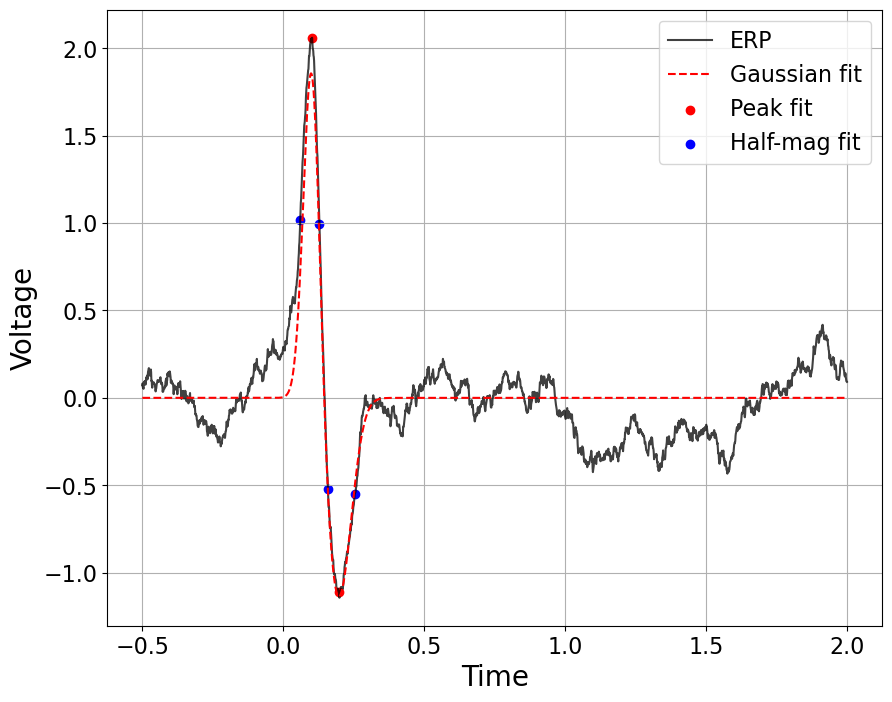

In [ ]:
# apply ERPparam

# initialize object with desired hyperparameters settings
model = ERPparam(peak_threshold=5)

# fit model
model.fit(time, erp)

# plot and print the results
model.print_results() # print summary of results
model.plot()  # plot the ERP and the model fit

# alternatively, you can also use the report method to both fit the model and plot/print the results in one step.
# model = ERPparam(peak_threshold=5)
# model.report(time, erp)

`model.plot()` plots the ERP signal and annotates the model fit. The ERP signal is plotted in black, while the Gaussian model fit is depicted as a dashed red line. The algorithm fits either standard or skewed Gaussians to the peaks in the signal (determined by the hyperparameter `peak_mode`). Each Guassian, $G(t)_n$, takes the form:

$G(t)_n = a * exp (\frac{- (t - \mu)^2}{2 * \sigma^2})$

where $t$ is time, $a$ is the amplitude of the peak, $\mu$ is the mean (peak time), and $\sigma$ is the standard deviation (peak width).

Skewed Gaussians, $S(t)_n$, are computed as the product of the Gaussian probability density function (PDF) described above and its cumulative density function (CDF).

The other plot annotations relate to the computation of the shape parameters. The red points indicate each identified peak, while the blue points indicate the half-magnitude points (i.e., where the signal reaches half of the peak amplitude). See `amplitude_fraction` hyperparameter for more information on tuning this behavior.

`model.print_results()` prints a summary of the results. Here we see that 2 peaks were fit, and some of the shape parameters describing those peaks, including the peak time ("time"), the peak amplitude ("Amp"), the peak duration ("Dur"), the peak symmetry ("Sym"), and the peak sharpness ("Sharp"). See full list of shape parameters below: 

* Full width at half-magnitude (FWHM): This is a measure of peak width. It describes the amount of time between the two half-magnitude points of a peak. 
* Rise time: The amount of time between the peak and the preceding half-magnitude point. 
* Decay time: The amount of time between the peak and the subsequent half-magnitude point.
* Symmetry: A measure of similarity between the rise and decay times, computed as the quotient `rise_time \ FWHM`
* Sharpness: FOOBAR
* Sharpness of the rise: FOOBAR
* Sharpness of the decay: FOOBAR
